In [68]:
from torch import nn
import torch
import torchvision
import torchvision.transforms as T
import matplotlib.pyplot as plt
from cgan import CGAN, D_model
import torch.nn.functional as F

In [5]:
EPOCHES = 15
batch_size = 32
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

model = D_model(10).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)


transform = T.ToTensor()

trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                      download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=1)

testset = torchvision.datasets.MNIST(root='./data', train=False,
                                     download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=1)


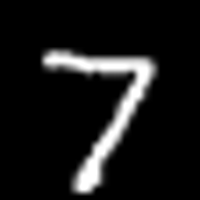

In [6]:

dataiter = iter(testloader)
images, labels = next(dataiter)


random_image = images[0] 
display(T.ToPILImage()(random_image.squeeze(0)).resize((200, 200)))

In [21]:
random_image.shape

torch.Size([1, 28, 28])

In [31]:
# training loop
for _ in range(EPOCHES):
    running_loss = 0
    for X, label in trainloader:
        X = X.to(device)
        label = label.to(device)
        optimizer.zero_grad()
        pred = model(X)
        loss = criterion(pred, label)
        loss.backward()
        
        optimizer.step()
        running_loss += loss.item()
    print(running_loss)



SyntaxError: invalid syntax (1719499557.py, line 28)

In [48]:
# model = D_model(10).to(device)


Parameter containing:
tensor([[[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.

### FGSM attack

In [213]:
def t_fgsm(img, model, target, eps): 
    x = nn.Parameter(img.unsqueeze(0))

    pred = model(x)
    loss = criterion(pred, target)
    loss.backward()

    x_ = x - eps / 255 * torch.sign(x.grad)
    return torch.clip(x_, min=0, max=1)


def u_fgsm(img, model, correct, eps):
    x = nn.Parameter(img.unsqueeze(0))

    pred = model(x)
    loss = criterion(pred, correct)
    loss.backward()

    x_ = x + eps / 255 * torch.sign(x.grad)
    return torch.clip(x_, min=0, max=1)

In [185]:
model = torch.load("model1.pt")
model.eval()

D_model(
  (model): Sequential(
    (0): Conv2d(1, 10, kernel_size=(2, 2), stride=(1, 1))
    (1): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (2): Conv2d(10, 128, kernel_size=(2, 2), stride=(2, 2))
    (3): AvgPool2d(kernel_size=3, stride=3, padding=0)
    (4): Conv2d(128, 256, kernel_size=(2, 2), stride=(2, 2))
    (5): Flatten(start_dim=1, end_dim=-1)
    (6): Linear(in_features=256, out_features=100, bias=True)
    (7): ReLU()
    (8): Linear(in_features=100, out_features=10, bias=True)
  )
)

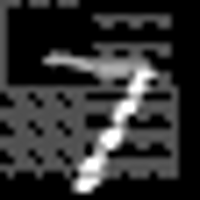

tensor([[3.3347e-04, 2.3319e-06, 9.5304e-01, 6.1460e-04, 2.4218e-07, 5.7008e-05,
         7.6407e-05, 4.5269e-02, 6.0840e-04, 4.8472e-07]])


In [222]:
target = torch.tensor([7])
new_img = u_fgsm(random_image, model, target, 80)

display(T.ToPILImage()(new_img.squeeze(0)).resize((200, 200)))

with torch.no_grad():
    pred = model(new_img)
    probs = F.softmax(pred, dim=-1)
    print(probs)

# mb the dataset is too easy???????? 

In [156]:
X, labels = next(iter(trainloader))
X.shape



torch.Size([32, 1, 28, 28])